In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
df = pd.read_csv('C:/Users/memdp/Python_Playground/text_files/landtemps2019avgs.txt')

In [27]:
df

,locationid,station,countryid,country,latabs,elevation,avgtemp
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.3330,34.0,28.251667
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.2550,10.4,29.585833
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.4330,26.8,29.400000
3,AEM00041218,AL_AIN_INTL,AE,United Arab Emirates,24.2620,264.9,29.061667
4,AFM00040938,HERAT,AF,Afghanistan,34.2100,977.2,18.257500
...,...,...,...,...,...,...,...
12090,WFM00091754,FUTUNA_ISL_MAOPOOPO,WF,Wallis and Futuna [France],14.3170,36.0,28.043636
12091,WIM00060096,VILLA_CISNEROSMIL,WI,Western Sahara,23.7000,10.0,20.695556
12092,WQW00041606,WAKE_ISLAND,WQ,Wake Island [United States],19.2833,4.3,28.125714
12093,ZA000067743,LIVINGSTONE,ZA,Zambia,17.8170,986.0,24.416667


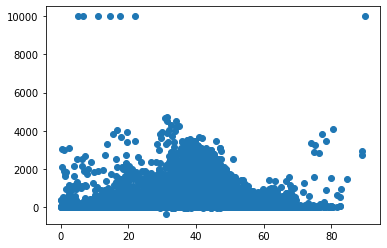

In [36]:
plt.scatter(df['latabs'], df['avgtemp'])

In [39]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df[['latabs', 'avgtemp']])
df['Cluster'] = y_pred

In [41]:
print(df.head())

    locationid             station countryid               country  latabs  \
0  AE000041196  SHARJAH_INTER_AIRP        AE  United Arab Emirates  25.333   
1  AEM00041194          DUBAI_INTL        AE  United Arab Emirates  25.255   
2  AEM00041217      ABU_DHABI_INTL        AE  United Arab Emirates  24.433   
3  AEM00041218         AL_AIN_INTL        AE  United Arab Emirates  24.262   
4  AFM00040938               HERAT        AF           Afghanistan  34.210   

   elevation    avgtemp  Cluster  
0       34.0  28.251667        1  
1       10.4  29.585833        1  
2       26.8  29.400000        1  
3      264.9  29.061667        1  
4      977.2  18.257500        2  


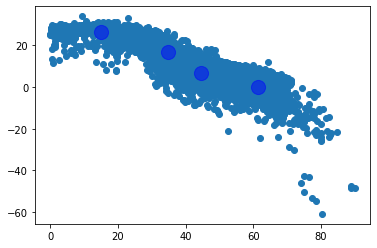

In [47]:
centers = kmeans.cluster_centers_
plt.scatter(df['latabs'], df['avgtemp'])
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

In [71]:
df_2 = pd.read_csv('C:/Users/memdp/Python_Playground/text_files/covidtotals.txt')

In [72]:
df_2

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,VNM,2020-06-01,Vietnam,328,0,3.370,0.000,97338583.0,308.127,32.6,6171.884,2.60
206,ESH,2020-06-01,Western Sahara,23,1,38.505,1.674,597330.0,NaN,28.4,NaN,NaN
207,YEM,2020-06-01,Yemen,323,80,10.829,2.682,29825968.0,53.508,20.3,1479.147,0.70
208,ZMB,2020-06-01,Zambia,1057,7,57.496,0.381,18383956.0,22.995,17.7,3689.251,2.00


In [73]:
sum(df_2['median_age'].isnull())

24

In [79]:
df_2['median_age'].dropna()

0      18.6
1      38.0
2      29.1
4      16.8
6      32.1
       ... 
205    32.6
206    28.4
207    20.3
208    17.7
209    19.6
Name: median_age, Length: 186, dtype: float64

In [80]:
sum(df_2['median_age'].isnull())

24

In [81]:
df_2['median_age'].fillna(0)

0      18.6
1      38.0
2      29.1
3       0.0
4      16.8
       ... 
205    32.6
206    28.4
207    20.3
208    17.7
209    19.6
Name: median_age, Length: 210, dtype: float64

In [83]:
_ = df_2['median_age'].fillna(0, inplace=True)

In [84]:
df_2

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,0.0,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,VNM,2020-06-01,Vietnam,328,0,3.370,0.000,97338583.0,308.127,32.6,6171.884,2.60
206,ESH,2020-06-01,Western Sahara,23,1,38.505,1.674,597330.0,NaN,28.4,NaN,NaN
207,YEM,2020-06-01,Yemen,323,80,10.829,2.682,29825968.0,53.508,20.3,1479.147,0.70
208,ZMB,2020-06-01,Zambia,1057,7,57.496,0.381,18383956.0,22.995,17.7,3689.251,2.00
